Average Fitlering Using Loops

True

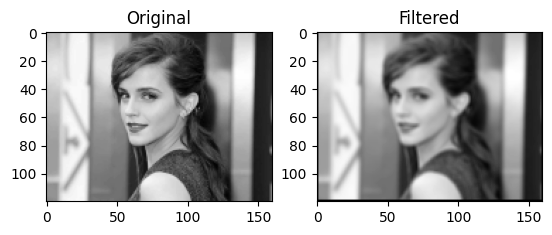

In [2]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')
    
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):            
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), kernel.flatten())         
    return result
    
img = cv.imread('images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
kernel = np.array([(1/9, 1/9, 1/9), (1/9, 1/9, 1/9), (1/9, 1/9, 1/9)], dtype='float')
imgb = filter(img, kernel)
imgb = imgb*255.0
imgb = imgb.astype(np.uint8)

axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('Filtered')
cv.imwrite('keira_filtered.png', imgb)

True

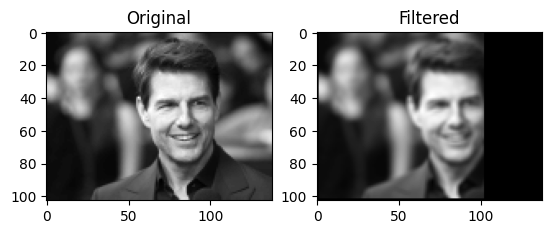

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math 

def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1   
    k_hh, k_hw = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')
    
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, h-k_hw):            
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), kernel.flatten())
    return result

img=cv.imread('images/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
kernel = np.array([(1/9, 1/9, 1/9), (1/9, 1/9, 1/9), (1/9, 1/9, 1/9)], dtype='float')
imgb = filter(img, kernel)
imgb = imgb*255.0
imgb = imgb.astype(np.uint8)

axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('Filtered')
cv.imwrite('keira_filtered.png', imgb)


        

Averaging Using Filt2D

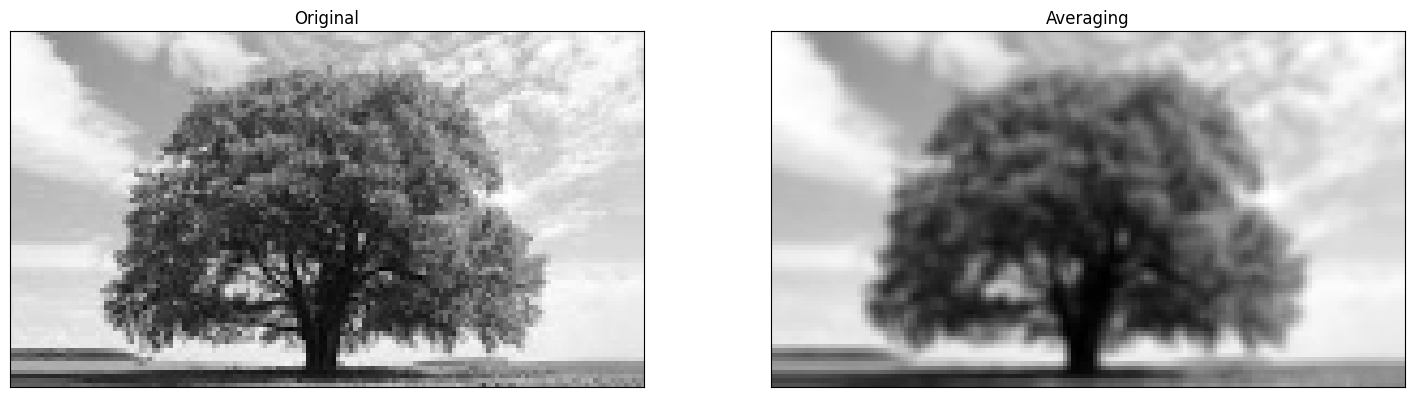

In [6]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/tree.jpeg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Averaging
kernel = np.ones((3,3),np.float32)/9
imgc = cv.filter2D(img,-1,kernel)

#cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imgc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

Sobel Vertical

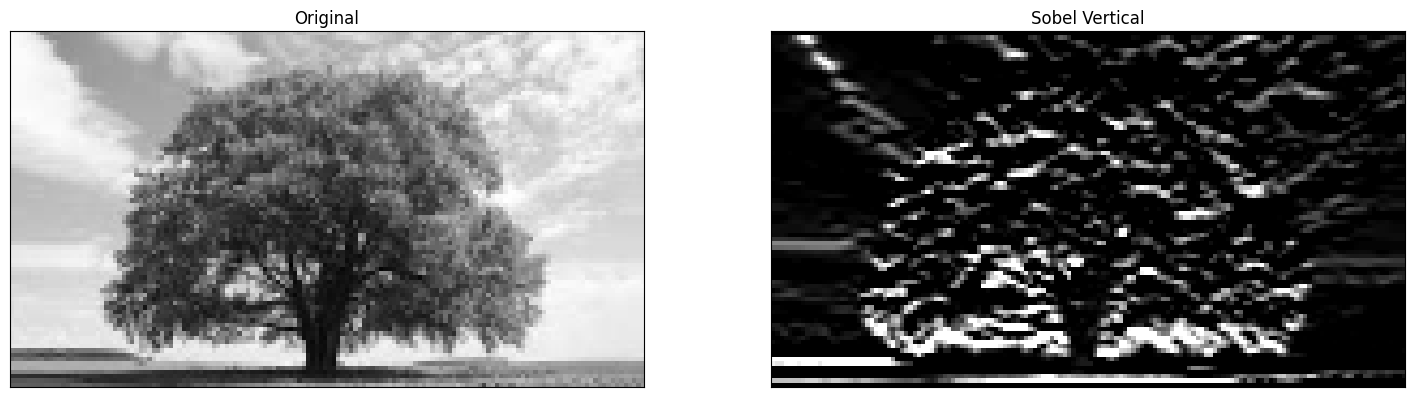

In [7]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/tree.jpeg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)

#cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imgc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

Sobel Horizontal

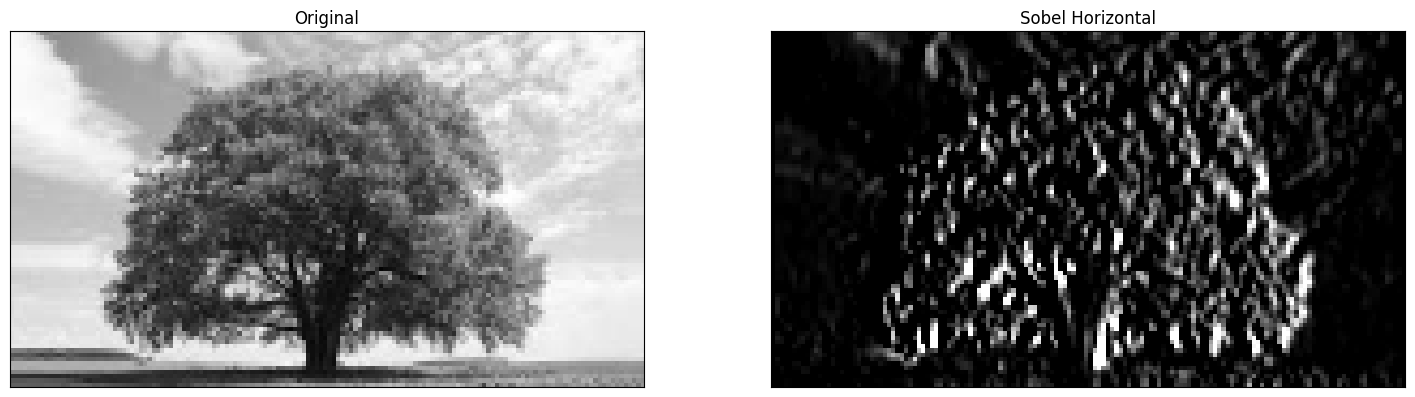

In [8]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/tree.jpeg', cv.IMREAD_REDUCED_GRAYSCALE_2)


# Sobel horizontal
kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)

#cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imgc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Horizontal')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

Sharpening
125 added to the img - smoothed when displaying

DescribeResult(nobs=224950, minmax=(-90.0, 141.0), mean=0.0005423427, variance=16.841209891483146, skewness=0.19524084062201671, kurtosis=44.66991297290385)


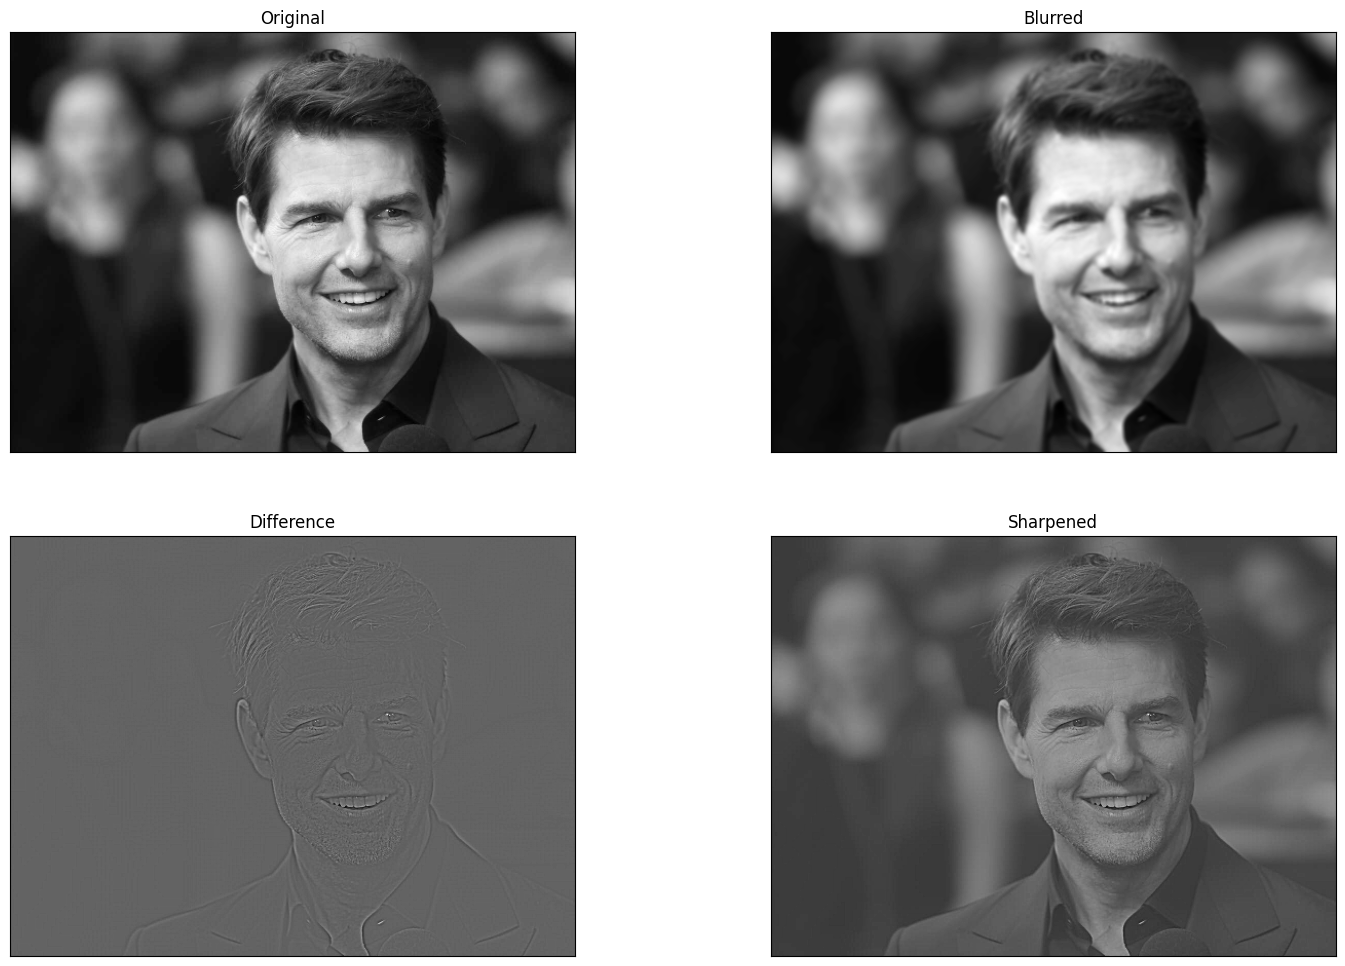

In [10]:
# Sharpening
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread('images/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff = img.astype('float32') - blurred.astype('float32')

sharpened = cv.addWeighted(img.astype('float32') , 1.0, diff, 1.5, 0)

print(stats.describe(diff.ravel()))


# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_original.jpg', img)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_blurred.jpg', blurred)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_diff.jpg', diff + 125)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_sharpened.jpg', sharpened)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,12))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(diff + 125, cmap='gray')
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray')
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
# plt.savefig('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/tom_unsharp.jpg')
plt.show()

Smoothing with Box Filter

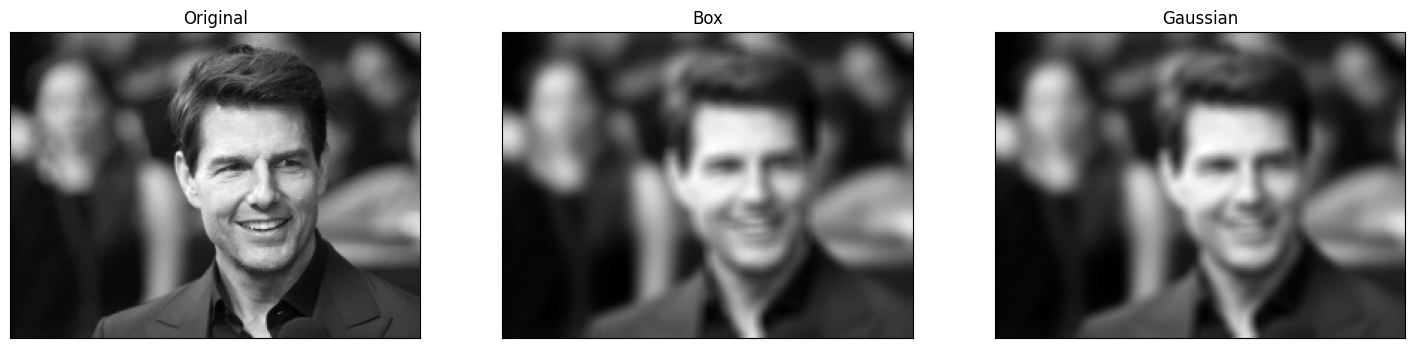

In [12]:
#  Box filer
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

img = cv.imread('images/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)

# Box filter
box = 1./81.*np.ones((9,9))
imgb = cv.filter2D(img,-1,box)


# Box filter
gaus = cv.getGaussianKernel(9, 4)
imgg = cv.sepFilter2D(img, -1, gaus, gaus)


cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/box_vs_gaussian_original.jpg', img)
cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/box_vs_gaussian_box.jpg', imgb)
cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/box_vs_gaussian_gaussian.jpg', imgg)


fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgb, cmap='gray')
axes[1].set_title('Box')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgg, cmap='gray')
axes[2].set_title('Gaussian')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()

Creating a Gaussian Kernel

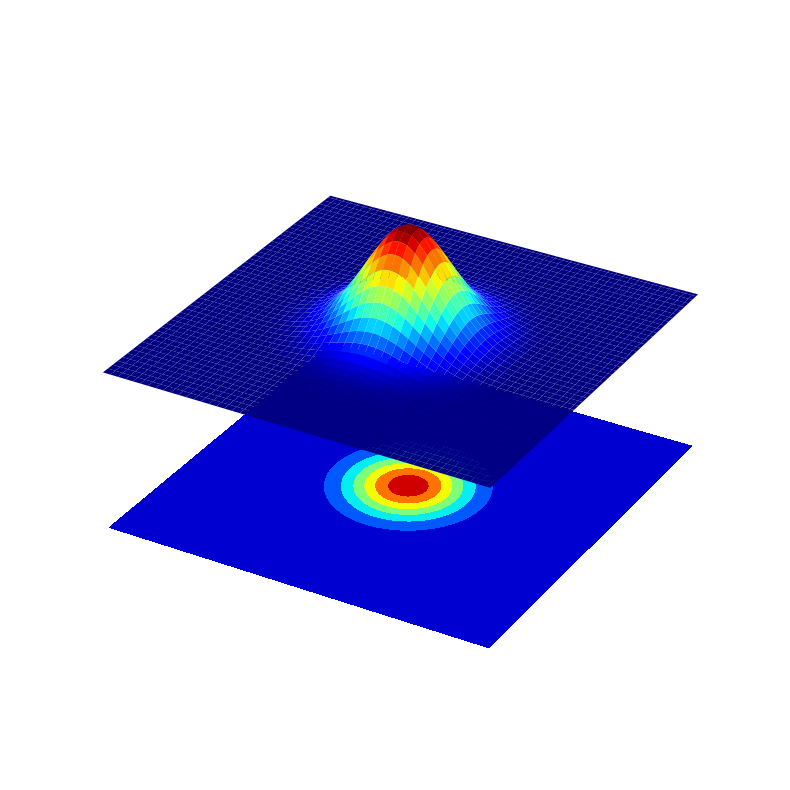

In [13]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1


X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# ax.set_aspect('equal', 'box')
#ax.view_init(90, 0)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# Hide grid lines
# ax.grid(False)
plt.axis('off')

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

# plt.savefig('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/gaussian_2d_5.jpg')

plt.show()

Gaussian Noise Filtering

uint8
255


AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

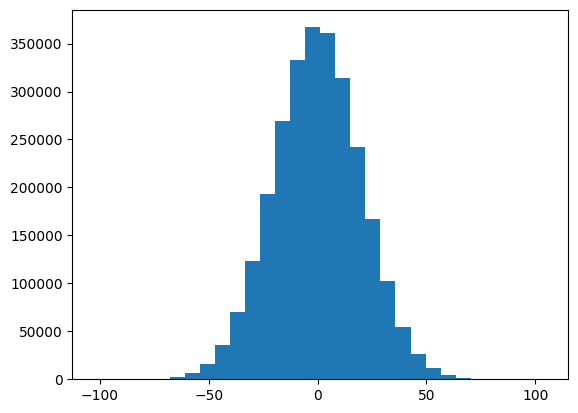

In [14]:
# Gaussian Noise Filtering
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('images/tom.jpg', cv.IMREAD_COLOR)
print(img.dtype)
print(img.max())
mu = 0.0
sigma = 20
gauss = np.array(img.shape).astype('uint8')
h, w, c = img.shape
gauss = np.random.normal(mu,sigma, (h, w, c))
#gauss = gauss.reshape(h, w, c)
noisy = cv.add(img, gauss, dtype=cv.CV_8UC3)

count, bins, ignored = plt.hist(gauss.flatten(), 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title('Noise Histogram')
plt.show()

sigma = 5
kernel = cv.getGaussianKernel(11, sigma)
filtered = cv.sepFilter2D(noisy, -1, kernel, kernel)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", noisy)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow("Image", filtered.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

Effect of σ

AttributeError: 'Legend' object has no attribute '_ncol'

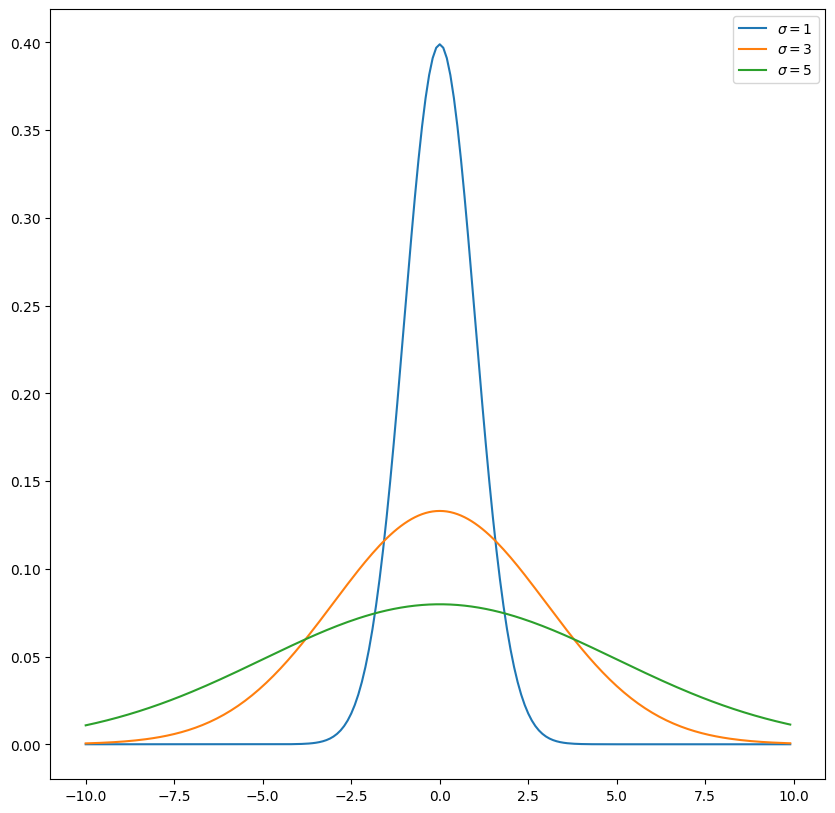

In [19]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import tikzplotlib

def g(x, mu, sigma):
    return 1./(sigma*np.sqrt(2.*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))


x = np.arange(-10., 10., 0.1)
fig, ax  = plt.subplots(1,1, sharex='all', sharey='all', figsize=(10,10))
ax.plot(x, g(x, 0, 1), label='$\sigma=1$')
ax.plot(x, g(x, 0, 3), label='$\sigma=3$')
ax.plot(x, g(x, 0, 5), label='$\sigma=5$')
ax.legend()
tikzplotlib.save("images/effect_of_sigma.text")
plt.show()